读取一幅灰度图像，对图像使用平滑模板运算，在屏幕上显示变换前、后图像，以及变换前后图像的
灰度直方图。

In [56]:
#!/usr/bin/python3 
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from PIL import ImageOps

In [57]:
root_path = '/root/DIVP_project/'
einstein_path = "project02/proj02-images/einstein_orig.tif"
baboon_path = "project02/proj02-images/baboon.jpg"
applo17_path = "project02/proj02-images/applo17_boulder_noisy.tif"

In [58]:
image_einstein = Image.open(root_path + einstein_path)


In [59]:
# 对image_einstein进行 平滑模板运算
def smooth_image(image: Image, kernel: np.ndarray) -> Image:
    # 获取图像的宽高
    width, height = image.size
    # 获取kernel的宽高
    kernel_width, kernel_height = kernel.shape
    # 创建一个新的图像 Image
    res_image = Image.new('L', (width, height), 0)
    # 获取图像的像素值
    res_image_pixel = res_image.load()
    image_pixel = image.load()
    # 对图像进行平滑处理
    # 添加padding，使得图像的边界也能被处理，防止越界image index out of range
    pad_width = kernel_width // 2
    pad_height = kernel_height // 2
    padded_image = ImageOps.expand(image, border=(pad_width, pad_height), fill=0)
    padded_image_pixel = padded_image.load()
    for i in range(width):
        for j in range(height):
            # 初始化像素值
            pixel = 0
            for k in range(kernel_width):
                for l in range(kernel_height):
                    # 获取像素值
                    pixel += padded_image_pixel[i + k, j + l] * kernel[k, l]
            # 将像素值保存到新的图像中
            if(np.sum(kernel) != 0):
                # 防止除数为0,均值滤波
                res_image_pixel[i, j] = int(pixel/np.sum(kernel))
            else:
                # 锐化滤波
                res_image_pixel[i, j] = int(pixel)
    
    return res_image

In [60]:
flag_noise = 0
# 为图像加入椒盐噪声
if flag_noise == 1:
    image_einstein = np.array(image_einstein)
    image_einstein = image_einstein + np.random.normal(0, 100, image_einstein.shape)
    image_einstein = np.clip(image_einstein, 0, 255)
    image_einstein = image_einstein.astype(np.uint8)
    image_einstein = Image.fromarray(image_einstein)

In [61]:
image_smoothed = smooth_image(image_einstein, np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]]))

In [62]:
image_temp = Image.open(root_path + applo17_path)

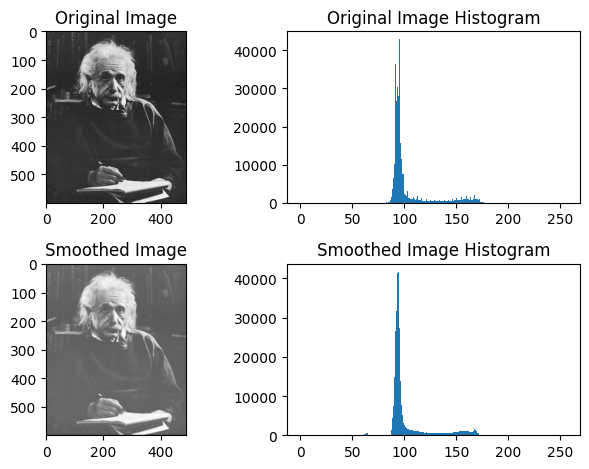

In [63]:
# 可视化该图像，并统计其直方图
plt.figure()
plt.subplot(221)
plt.imshow(image_einstein, cmap='gray')
plt.title('Original Image')
plt.subplot(222)
plt.hist(np.array(image_einstein).flatten(), bins=256, range=[0, 256])
plt.title('Original Image Histogram')
plt.subplot(223)
plt.imshow(image_smoothed, cmap='gray')
plt.title('Smoothed Image')
plt.subplot(224)
plt.hist(np.array(image_smoothed).flatten(), bins=256, range=[0, 256])
plt.title('Smoothed Image Histogram')
plt.tight_layout()
plt.show()